# Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
import alpaca_trade_api as tradeapi
from alpaca_trade_api import TimeFrame, TimeFrameUnit

<BarContainer object of 4 artists>

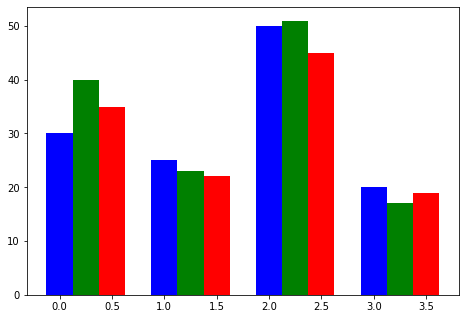

In [15]:
data = [[80.7, 25, 50, 20],
[19.3, 23, 51, 17]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)


TypeError: float() argument must be a string or a number, not 'NoneType'

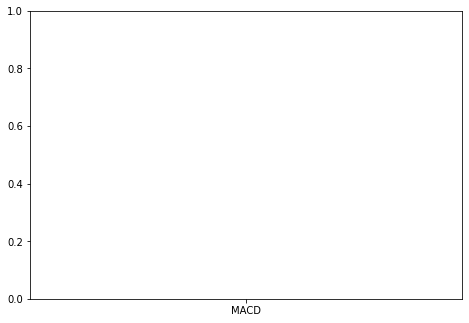

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar('MACD',80.7, color = "#1F78B4",label='Hardware %')
ax.bar('MACD',(19.3), color = "#FE7F0E",label='Software %')
ax.bar('RSI',63.63, color = "#1F78B4")
ax.bar('RSI',(36.37), color = "#FE7F0E")
ax.bar('AROON',59.09, color = "#1F78B4")
ax.bar('AROON',40.91, color = "#FE7F0E")
plt.legend(loc='upper right')
plt.xlabel("Technical Indicators")
plt.ylabel("Percentage %")
plt.show()

# Importing Data and Visualisastion

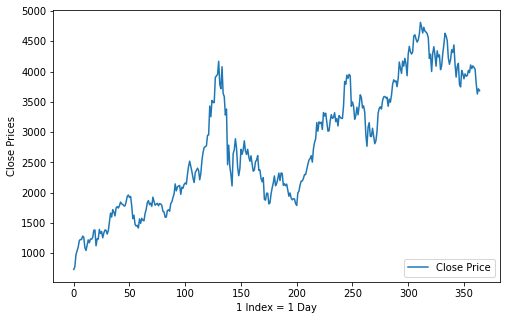

In [ ]:
# SEC_KEY = '7mi6lnaTynfrzxfDYyYUarBpUJ35sSgVEVIj6RZG'
# PUB_KEY ='PKDL8E9SBYH9GYYXXZNL'
# BASE_URL ='https://paper-api.alpaca.markets'
# symb = "TSLA"
# api = tradeapi.REST(key_id= PUB_KEY, secret_key=SEC_KEY, base_url=BASE_URL) # For real trading, don't enter a base_url
# df = api.get_barset(symb, TimeFrame(15, TimeFrameUnit.Minute), limit=300).df  # Get one bar object for each of the past 5 minutes
# df=df[symb]
# df['Close']=df['close']
# df['High']=df['high']
# df['Low']=df['low']
# df['Open']=df['open']
# df['Volume']=df['volume']
df=pd.read_csv('ETH-USD.csv')

# plt.xlim([-2,210])
plt.figure(figsize=(8,5))
df.dropna(inplace=True)
df = df.reset_index(drop=True)
plt.plot(df['Close'],label='Close Price' )
# plt.title("BTC/USD",size=32)
plt.legend(loc='lower right')
plt.xlabel("1 Index = 1 Day")
plt.ylabel("Close Prices")
plt.show()

# Macd Indicator and visualisation

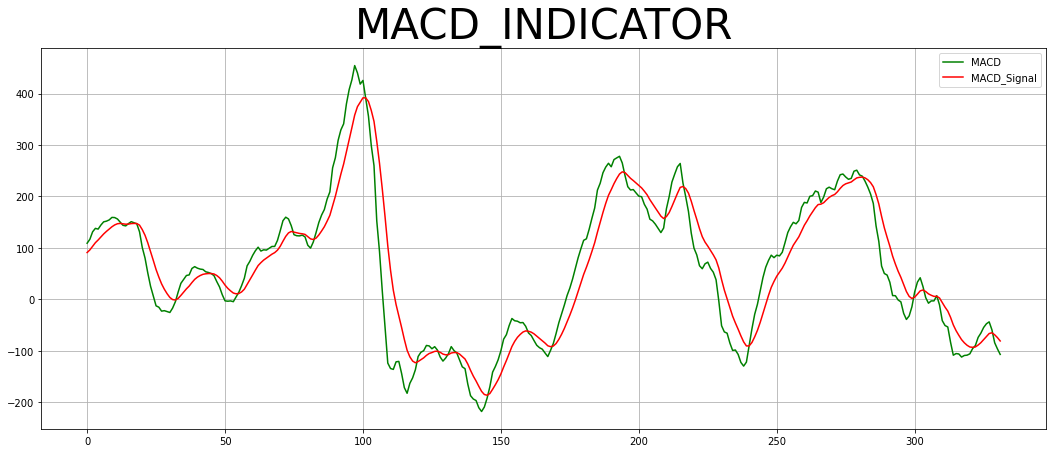

In [ ]:
macd, macdsignal, macdhist = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

df['macd'] = macd
df['macd_signal'] = macdsignal
df.dropna(inplace=True)
df = df.reset_index(drop=True)
plt.figure(figsize=(18,7))
plt.plot(df['macd'],color='g',label='MACD')
plt.plot(df['macd_signal'],color='r',label='MACD_Signal')
plt.legend()
plt.title('MACD_INDICATOR',size=42)
plt.grid()
plt.show()

# Empty Arrays


In [ ]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
Close_order_sell=[]
Close_order_buy=[]
position_Buy=None
position_Sell=None

# Decision Making Process

Profit = 21
Stop_loss = 5


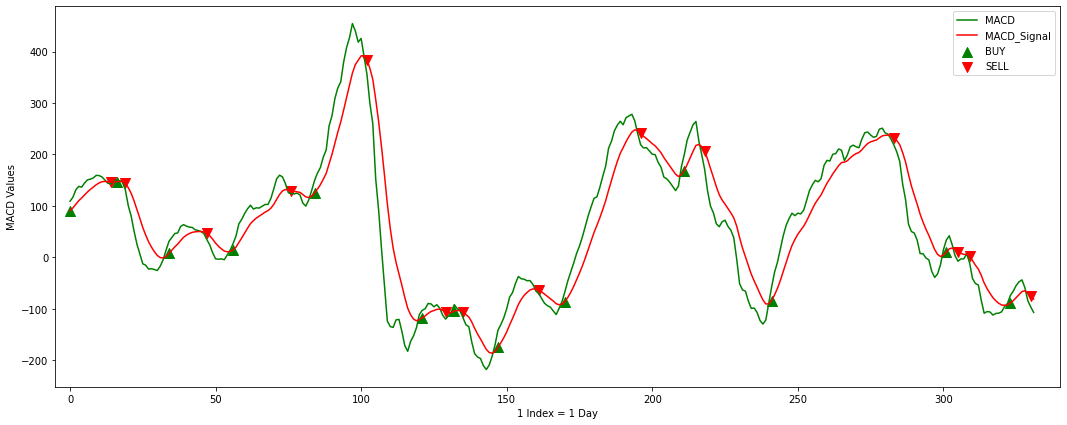

In [ ]:
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['macd'][i] > df['macd_signal'][i] and position_Buy!="Buy" and position_Sell!="Sell"  :
        buy.append(df['macd_signal'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        Close_order_buy.append(df['macd_signal'][i])
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['macd'][i]<df['macd_signal'][i] and position_Sell!="Sell" and position_Buy!="Buy":
        sell.append(df['macd_signal'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Close_order_sell.append(df['macd_signal'][i])
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_macd#######################################################
    elif position_Buy=="Buy" and df['macd'][i]<df['macd_signal'][i]:
        if df['macd'][i]>Close_order_buy[-1] :
            Stop_loss.append(np.nan)
            Profit.append(df['macd'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['macd'][i]<Close_order_buy[-1] :
            Stop_loss.append(df['macd'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_macd#######################################################
    elif position_Sell=="Sell" and df['macd'][i]>df['macd_signal'][i]:
        if df['macd'][i]<Close_order_sell[-1]:
            Stop_loss.append(np.nan)
            Profit.append(df['macd'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['macd'][i]>Close_order_sell[-1]:
            Stop_loss.append(df['macd'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))

plt.plot(df['macd'],color='g',label='MACD')
plt.plot(df['macd_signal'],color='r',label='MACD_Signal')
plt.scatter(df.index,df['buy'],marker='^',color='g',s=100,label='BUY')
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100,label='SELL')
# plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100,label='STOP LOSS')
# plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100,label='PROFIT')
plt.legend()
# plt.title('MACD INDICATOR',size=42)
# plt.grid()
plt.xlim([-5,340])
plt.xlabel("1 Index = 1 Day")
plt.ylabel("MACD Values")
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())

In [ ]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
Close_order_sell=[]
Close_order_buy=[]
position_Buy=None
position_Sell=None

NameError: name 'symb' is not defined

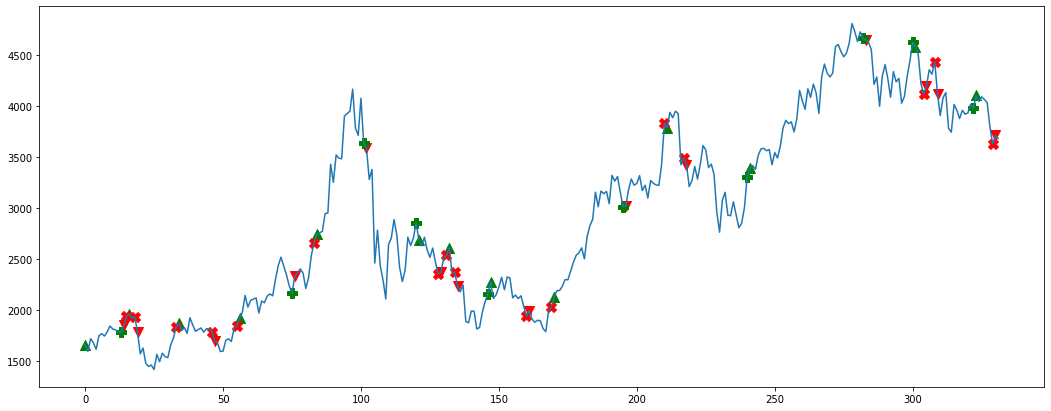

In [ ]:
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['macd'][i]>df['macd_signal'][i] and position_Buy!="Buy" and position_Sell!="Sell"  :
        buy.append(df['Close'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        Close_order_buy.append(df['Close'][i])
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['macd'][i] <df['macd_signal'][i] and position_Sell!="Sell" and position_Buy!="Buy":
        sell.append(df['Close'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Close_order_sell.append(df['Close'][i])
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_macd#######################################################
    elif position_Buy=="Buy" and df['macd'][i] < df['macd_signal'][i]:
        if df['Close'][i]>Close_order_buy[-1] :
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['Close'][i]<Close_order_buy[-1] :
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
            position_Buy=None
######################################SIGNAL FOR SELL_macd#######################################################
    elif position_Sell=="Sell" and df['macd'][i]>df['macd_signal'][i]:
        if df['Close'][i]<Close_order_sell[-1]:
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['Close'][i]>Close_order_sell[-1]:
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
            position_Sell=None
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))

plt.plot(df['Close'])

plt.scatter(df.index,df['buy'],marker='^',color='g',s=100,label='BUY')
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100,label='SELL')
plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100,label='STOP LOSS')
plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100,label='PROFIT')
plt.title(symb,size=42)

plt.grid()
print((df[df['buy']!=np.nan]).count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")